1) Using Stegano Library of python

In [ ]:
!pip install stegano

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


We calculate the ratio of the hidden data to the total image size, and if this ratio is above a specified threshold (0.4 by default), we consider steganography to be detected. You can adjust the threshold value as needed based on your specific requirements.

In [ ]:
from stegano import lsb

def detect_steganography(image_path, threshold=0.4):
    try:
        # Load the cover image and reveal the LSB data
        revealed_data = lsb.reveal(image_path)

        # Calculate the ratio of hidden data to total data
        data_length = len(revealed_data)
        image_size = lsb.image_size(image_path)
        ratio = data_length / image_size

        # If the ratio is above the threshold, steganography is detected
        if ratio >= threshold:
            return True
        else:
            return False
    except:
        # If the reveal operation fails, no steganography is detected
        return False

# Path to the image file
image_path = "/content/img2.png"

# Detect steganography in the image
is_stego = detect_steganography(image_path)

# Print the result
if is_stego:
    print("Steganography detected in the image.")
else:
    print("No steganography detected in the image.")


No steganography detected in the image.


In [ ]:
from stegano import lsb

def detect_steganography(image_path, threshold=0.4):
    try:
        # Load the cover image and reveal the LSB data
        revealed_data = lsb.reveal(image_path)

        # Calculate the ratio of hidden data to total data
        data_length = len(revealed_data)
        image_size = lsb.image_size(image_path)
        ratio = data_length / image_size

        # If the ratio is above the threshold, steganography is detected
        if ratio >= threshold:
            return True
        else:
            return False
    except:
        # If the reveal operation fails, no steganography is detected
        return False

# Path to the image file
image_path = "/content/1_openpuff.jpg"

# Detect steganography in the image
is_stego = detect_steganography(image_path)

# Print the result
if is_stego:
    print("Steganography detected in the image.")
else:
    print("No steganography detected in the image.")


No steganography detected in the image.


2) Shannon Entropy

The code you've provided calculates the Shannon entropy of the image's pixel intensity histogram and then compares it to a threshold to detect steganography. This approach can be used as a basic method for steganography detection, but it has limitations.

While calculating the entropy of an image can be a useful technique for detecting some forms of steganography, it is not foolproof. Steganography methods can be designed to have low entropy and not be easily detectable by such entropy-based methods.

In your code, the threshold is set to 7.0, which is an arbitrary value. The choice of the threshold can significantly affect the detection performance. You may need to fine-tune the threshold based on the specific types of steganography you expect to encounter and the characteristics of the images in question.

Also, the code converts the image to grayscale, which might not be suitable for detecting color-based steganography. Different steganography techniques may manipulate color channels, so a more comprehensive analysis may be required for color images.

In summary, your code provides a basic approach to steganography detection using entropy, but it has limitations and may not be effective in all cases. More advanced steganalysis techniques and tools are available for more robust detection of steganography in images.

Natural Images vs. Steganographic Images: In a natural, unaltered image, the pixel intensities tend to be distributed relatively uniformly, resulting in high entropy. In contrast, steganographic images, which have hidden data encoded within them, may exhibit patterns or regularities that lower the entropy. Detecting such deviations from typical entropy levels can be an indicator of potential steganography.

Entropy doesn't have a fixed range from 0 to 10. Instead, it typically ranges from 0 to some maximum value, which depends on the number of possible outcomes or levels in the data. In the context of digital images, where pixel intensities are often represented using 8 bits (0 to 255), the entropy usually ranges from 0 to the maximum entropy value for an 8-bit representation, which is roughly 8 bits. This means the typical range is 0 to 8.

To clarify:

Entropy of 0 indicates that all pixel values in the image are the same (no randomness).
Entropy of 8 (or close to 8 for an 8-bit image) indicates that pixel values are uniformly distributed across all possible intensity levels, meaning maximum randomness.

In [ ]:
#bard
import cv2
import numpy as np

def detect_steganography(image_path):
  """Detects steganography in an image using Shannon entropy.

  Args:
    image_path: The path to the image file.

  Returns:
    True if steganography is detected, False otherwise.
  """

  # Load the image
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)

  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Calculate the histogram of pixel intensities
  histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

  # Normalize the histogram
  histogram /= histogram.sum()

  # Calculate the Shannon entropy of the histogram
  entropy = -np.sum(histogram * np.log2(histogram + 1e-10))

  # Set a threshold for steganography detection
  threshold = 7.0

  # Compare the entropy with the threshold
  if entropy > threshold:
    return True  # Steganography detected
  else:
    return False  # No steganography detected

# Path to the image file
image_path = "/content/image_nonsteg.jpg"

# Detect steganography in the image
is_stego = detect_steganography(image_path)

# Print the result
if is_stego:
  print("Steganography detected in the image.")
else:
  print("No steganography detected in the image.")

Steganography detected in the image.


In [ ]:
import cv2
import numpy as np

def detect_steganography(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the histogram of pixel intensities
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Normalize the histogram
    histogram /= histogram.sum()

    # Calculate the Shannon entropy of the histogram
    entropy = -np.sum(histogram * np.log2(histogram + 1e-10))

    # Set a threshold for steganography detection
    threshold = 1.0

    # Compare the entropy with the threshold
    if entropy > threshold:
        return True  # Steganography detected
    else:
        return False  # No steganography detected

# Path to the image file
image_path = "/content/1.jpg"

# Detect steganography in the image
is_stego = detect_steganography(image_path)

# Print the result
if is_stego:
    print("Steganography detected in the image.")
else:
    print("No steganography detected in the image.")


Steganography detected in the image.


In [ ]:
import cv2
import numpy as np

def detect_steganography(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the histogram of pixel intensities
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Normalize the histogram
    histogram /= histogram.sum()

    # Calculate the Shannon entropy of the histogram
    entropy = -np.sum(histogram * np.log2(histogram + 1e-10))

    # Set a threshold for steganography detection
    threshold = 1.0

    # Compare the entropy with the threshold
    if entropy > threshold:
        return True  # Steganography detected
    else:
        return False  # No steganography detected

# Path to the image file
image_path = "/content/image_nonsteg.jpg"

# Detect steganography in the image
is_stego = detect_steganography(image_path)

# Print the result
if is_stego:
    print("Steganography detected in the image.")
else:
    print("No steganography detected in the image.")


Steganography detected in the image.


In [ ]:
import cv2
import numpy as np

def detect_steganography(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the histogram of pixel intensities
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Normalize the histogram
    histogram /= histogram.sum()

    # Calculate the Shannon entropy of the histogram
    entropy = -np.sum(histogram * np.log2(histogram + 1e-10))

    # Set a threshold for steganography detection
    threshold = 1.0

    # Compare the entropy with the threshold
    if entropy > threshold:
        return True  # Steganography detected
    else:
        return False  # No steganography detected

# Path to the image file
image_path = "/content/1_openpuff.jpg"

# Detect steganography in the image
is_stego = detect_steganography(image_path)

# Print the result
if is_stego:
    print("Steganography detected in the image.")
else:
    print("No steganography detected in the image.")


Steganography detected in the image.


In [ ]:
import cv2
import numpy as np

def detect_steganography(image_path, entropy_threshold=7.0, spatial_threshold=0.02):
    try:
        # Load the image
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Calculate the histogram of pixel intensities
        histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

        # Normalize the histogram
        histogram /= histogram.sum()

        # Calculate the Shannon entropy of the histogram
        entropy = -np.sum(histogram * np.log2(histogram + 1e-10))

        # Perform spatial analysis to check for regular patterns
        diff = np.abs(np.diff(gray_image))
        spatial_entropy = diff.mean()

        # Set thresholds for both entropy and spatial analysis
        if entropy > entropy_threshold and spatial_entropy > spatial_threshold:
            return True  # Steganography detected

    except:
        pass

    return False  # No steganography detected

# Path to the image file
image_path = "/content/1.jpg"

# Detect steganography in the image
is_stego = detect_steganography(image_path)

# Print the result
if is_stego:
    print("Steganography detected in the image.")
else:
    print("No steganography detected in the image.")


Steganography detected in the image.


3) GMM


In this code, you can adjust the num_components and threshold parameters as needed to optimize the GMM-based steganography detection for your specific dataset and requirements. Additionally, it retains the try-except block for robustness.

In [ ]:
import cv2
import numpy as np
from sklearn.mixture import GaussianMixture

def detect_steganography(image_path, num_components=2, threshold=10.0):
    try:
        # Load the image
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Reshape the grayscale image to a 1D array
        reshaped_image = gray_image.reshape(-1, 1)

        # Fit a Gaussian Mixture Model with Expectation-Maximization
        gmm = GaussianMixture(n_components=num_components)
        gmm.fit(reshaped_image)

        # Get the weights and means of the Gaussian components
        weights = gmm.weights_
        means = gmm.means_

        # Calculate the difference between the means
        mean_diff = np.abs(means[0] - means[1])

        # Compare the mean difference with the threshold
        if mean_diff > threshold:
            return True  # Steganography detected

    except:
        pass

    return False  # No steganography detected

# Path to the image file
image_path = "/content/1.jpg"

# Detect steganography in the image
is_stego = detect_steganography(image_path, num_components=2, threshold=10.0)

# Print the result
if is_stego:
    print("Steganography detected in the image.")
else:
    print("No steganography detected in the image.")


Steganography detected in the image.


4) SRM

This code combines three different techniques: Gaussian Mixture Model (GMM), Shannon entropy, and spatial analysis. You can adjust the parameters and thresholds to improve the accuracy of steganography detection for your specific use case.

In [ ]:
import cv2
import numpy as np
from sklearn.mixture import GaussianMixture

def detect_steganography(image_path, num_components=2, entropy_threshold=7.0, spatial_threshold=0.02, gmm_threshold=10.0):
    try:
        # Load the image
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Reshape the grayscale image to a 1D array
        reshaped_image = gray_image.reshape(-1, 1)

        # Fit a Gaussian Mixture Model with Expectation-Maximization
        gmm = GaussianMixture(n_components=num_components)
        gmm.fit(reshaped_image)

        # Get the weights and means of the Gaussian components
        weights = gmm.weights_
        means = gmm.means_

        # Calculate the difference between the means
        mean_diff = np.abs(means[0] - means[1])

        # Calculate the histogram of pixel intensities
        histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

        # Normalize the histogram
        histogram /= histogram.sum()

        # Calculate the Shannon entropy of the histogram
        entropy = -np.sum(histogram * np.log2(histogram + 1e-10))

        # Perform spatial analysis to check for regular patterns
        diff = np.abs(np.diff(gray_image))
        spatial_entropy = diff.mean()

        # Set thresholds for both entropy and spatial analysis
        if entropy > entropy_threshold and spatial_entropy > spatial_threshold:
            return True  # Steganography detected

        # Compare the mean difference with the GMM threshold
        if mean_diff > gmm_threshold:
            return True  # Steganography detected

    except:
        pass

    return False  # No steganography detected

# Path to the image file
image_path = "/content/1.jpg"

# Detect steganography in the image
is_stego = detect_steganography(image_path, num_components=2, entropy_threshold=7.0, spatial_threshold=0.02, gmm_threshold=10.0)

# Print the result
if is_stego:
    print("Steganography detected in the image.")
else:
    print("No steganography detected in the image.")

Steganography detected in the image.


5) Random Forest

SRM code

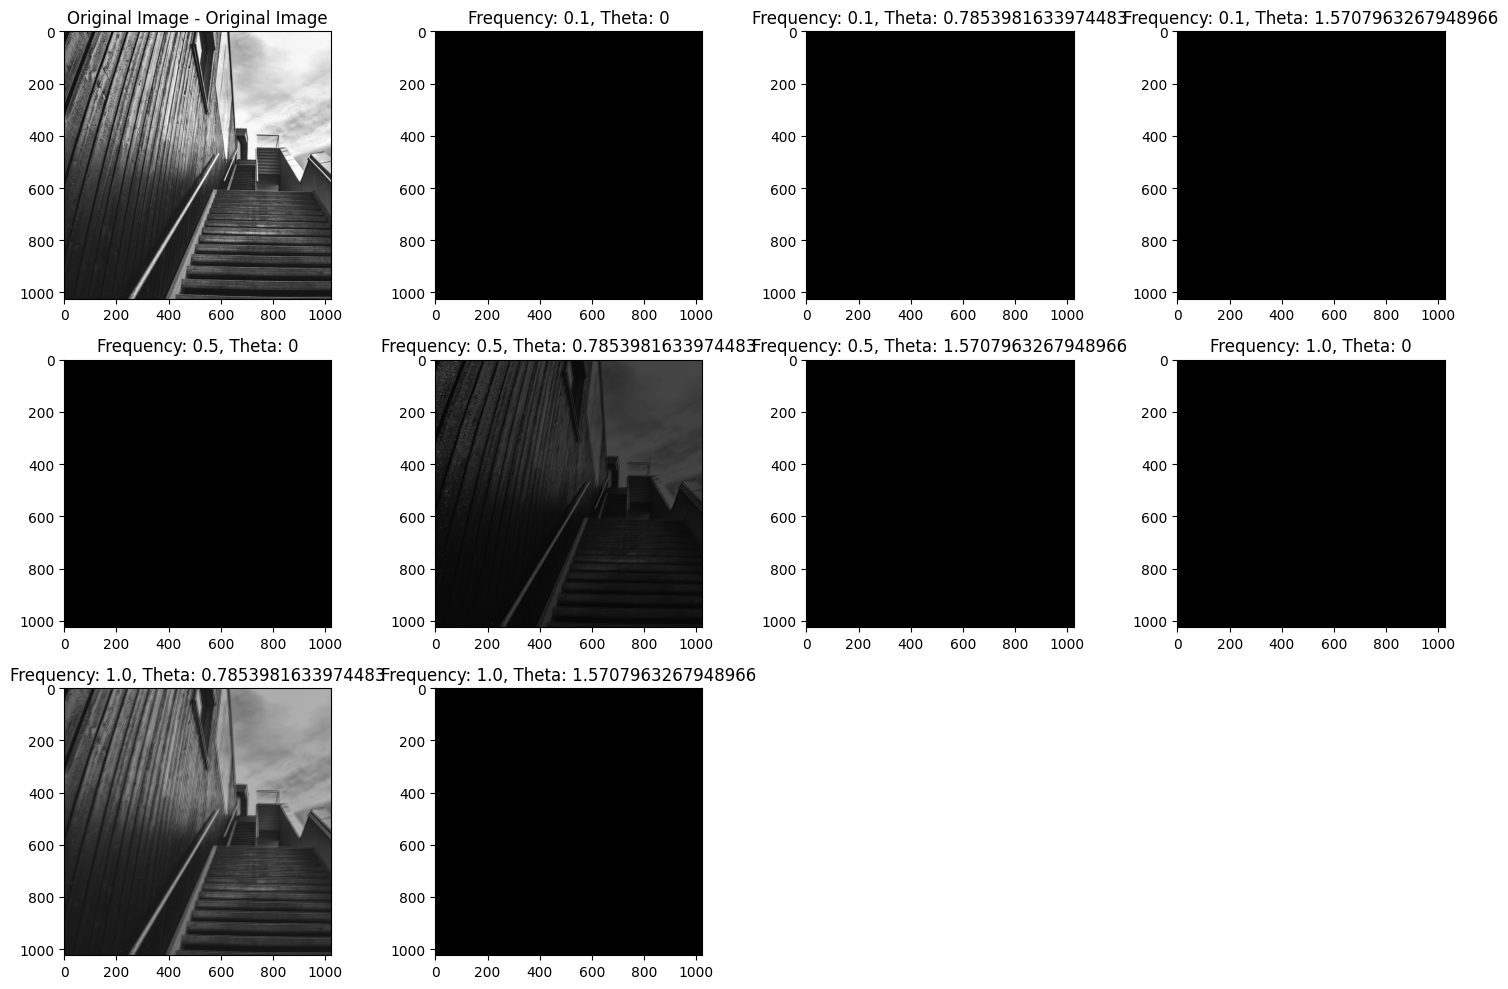

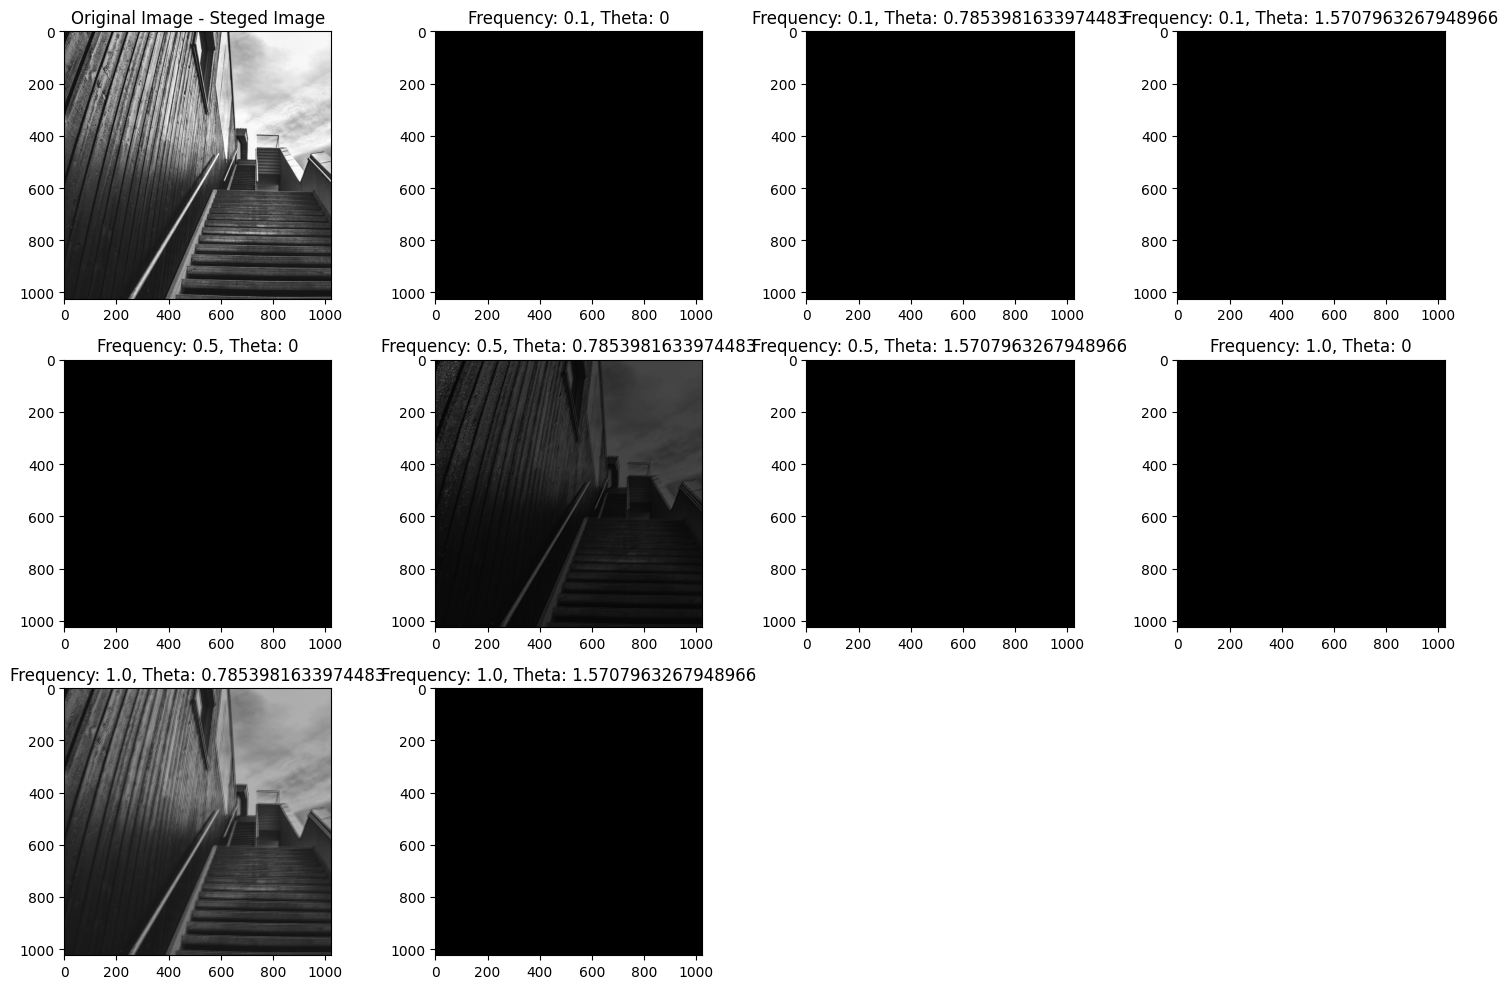

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_gabor_filter(image, frequency, theta):
    # Apply Gabor filter to the image
    kernel = cv2.getGaborKernel((5, 5), sigma=2.0, theta=theta, lambd=frequency, gamma=0.5, psi=0, ktype=cv2.CV_32F)
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)

    return filtered_image

def visualize_srm(image, frequencies, thetas, title):
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 4, 1)  # Adjusted the subplot count to 3 rows and 4 columns
    plt.imshow(image, cmap='gray')
    plt.title(f'Original Image - {title}')

    i = 2
    for frequency in frequencies:
        for theta in thetas:
            srm_image = apply_gabor_filter(image, frequency, theta)
            plt.subplot(3, 4, i)  # Adjusted the subplot count to 3 rows and 4 columns
            plt.imshow(srm_image, cmap='gray')
            plt.title(f'Frequency: {frequency}, Theta: {theta}')
            i += 1

    plt.tight_layout()
    plt.show()

def main():
    # Load grayscale images
    # original_image = cv2.imread('/content/cat.jpg', cv2.IMREAD_GRAYSCALE)
    # steged_image = cv2.imread('/content/openstegooutput.bmp', cv2.IMREAD_GRAYSCALE)
    original_image = cv2.imread('/content/1.jpg', cv2.IMREAD_GRAYSCALE)
    steged_image = cv2.imread('/content/1_openpuff.jpg', cv2.IMREAD_GRAYSCALE)

    # Set Gabor filter parameters
    frequencies = [0.1, 0.5, 1.0]
    thetas = [0, np.pi/4, np.pi/2]

    # Visualize the images in terms of SRM using Gabor filters
    visualize_srm(original_image, frequencies, thetas, 'Original Image')
    visualize_srm(steged_image, frequencies, thetas, 'Steged Image')

if __name__ == '__main__':
    main()


In [ ]:
#4 dec work

Gaussian Mixture Model (GMM) is a statistical model that represents a mixture of multiple Gaussian distributions. In the context of steganalysis, GMMs can be applied for feature extraction and classification to detect the presence of hidden information (steganography or steganographic content) within digital media, such as images, audio, or video.

Here's a general overview of how GMMs can be used in steganalysis:

Feature Extraction:

The first step in steganalysis is often extracting relevant features from the cover (original) and stego (modified with hidden information) media. Features could be statistical properties, texture characteristics, or other relevant attributes of the media.
GMMs can be used to model the distribution of these features. For example, if you have a set of features extracted from a large dataset of cover images, you can fit a GMM to model the distribution of these features.
Modeling Cover and Stego Distributions:

Once you have a GMM fitted to the cover media's features, you can compare it with the features extracted from the stego media. The idea is that the presence of hidden information may cause a shift in the distribution of these features.
Detection:

By comparing the likelihood of the features under the cover GMM and the stego GMM, you can develop a statistical measure to detect the presence of steganographic content. This comparison may involve likelihood ratios, log-likelihood values, or other statistical measures.
Thresholding:

Setting an appropriate threshold is crucial for decision-making. If the statistical measure crosses a certain threshold, the media is classified as either containing or not containing hidden information.
Training and Evaluation:

GMMs may require training on a representative dataset of cover and stego media to learn the characteristics of the features. Subsequently, the model can be evaluated on a separate set of data to assess its performance.
It's important to note that while GMMs can be effective in certain scenarios, the choice of features and the overall steganalysis approach may vary based on the specific characteristics of the media and the steganographic techniques employed. Additionally, more advanced machine learning techniques, such as deep learning, are also being explored in the field of steganalysis.

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume you have a function extract_features() for feature extraction
def extract_features(image):
    # Implement your feature extraction logic here
    # This can include statistical measures, texture characteristics, etc.
    # Return a 1D array of features for each image
    pass

# Generate a synthetic dataset for illustration purposes
# In real-world scenarios, you would load your own dataset
np.random.seed(42)
num_samples = 1000
cover_images = np.random.rand(num_samples, 64, 64)  # Replace with your actual cover images
stego_images = np.random.rand(num_samples, 64, 64)   # Replace with your actual stego images

# Extract features from both cover and stego images
cover_features = np.array([extract_features(image) for image in cover_images])
stego_features = np.array([extract_features(image) for image in stego_images])

# Combine features and create labels (0 for cover, 1 for stego)
X = np.concatenate((cover_features, stego_features), axis=0)
y = np.concatenate((np.zeros(num_samples), np.ones(num_samples)))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)  # Assuming two components (cover and stego)
gmm.fit(X_train)

# Make predictions on the test set
y_pred = gmm.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
